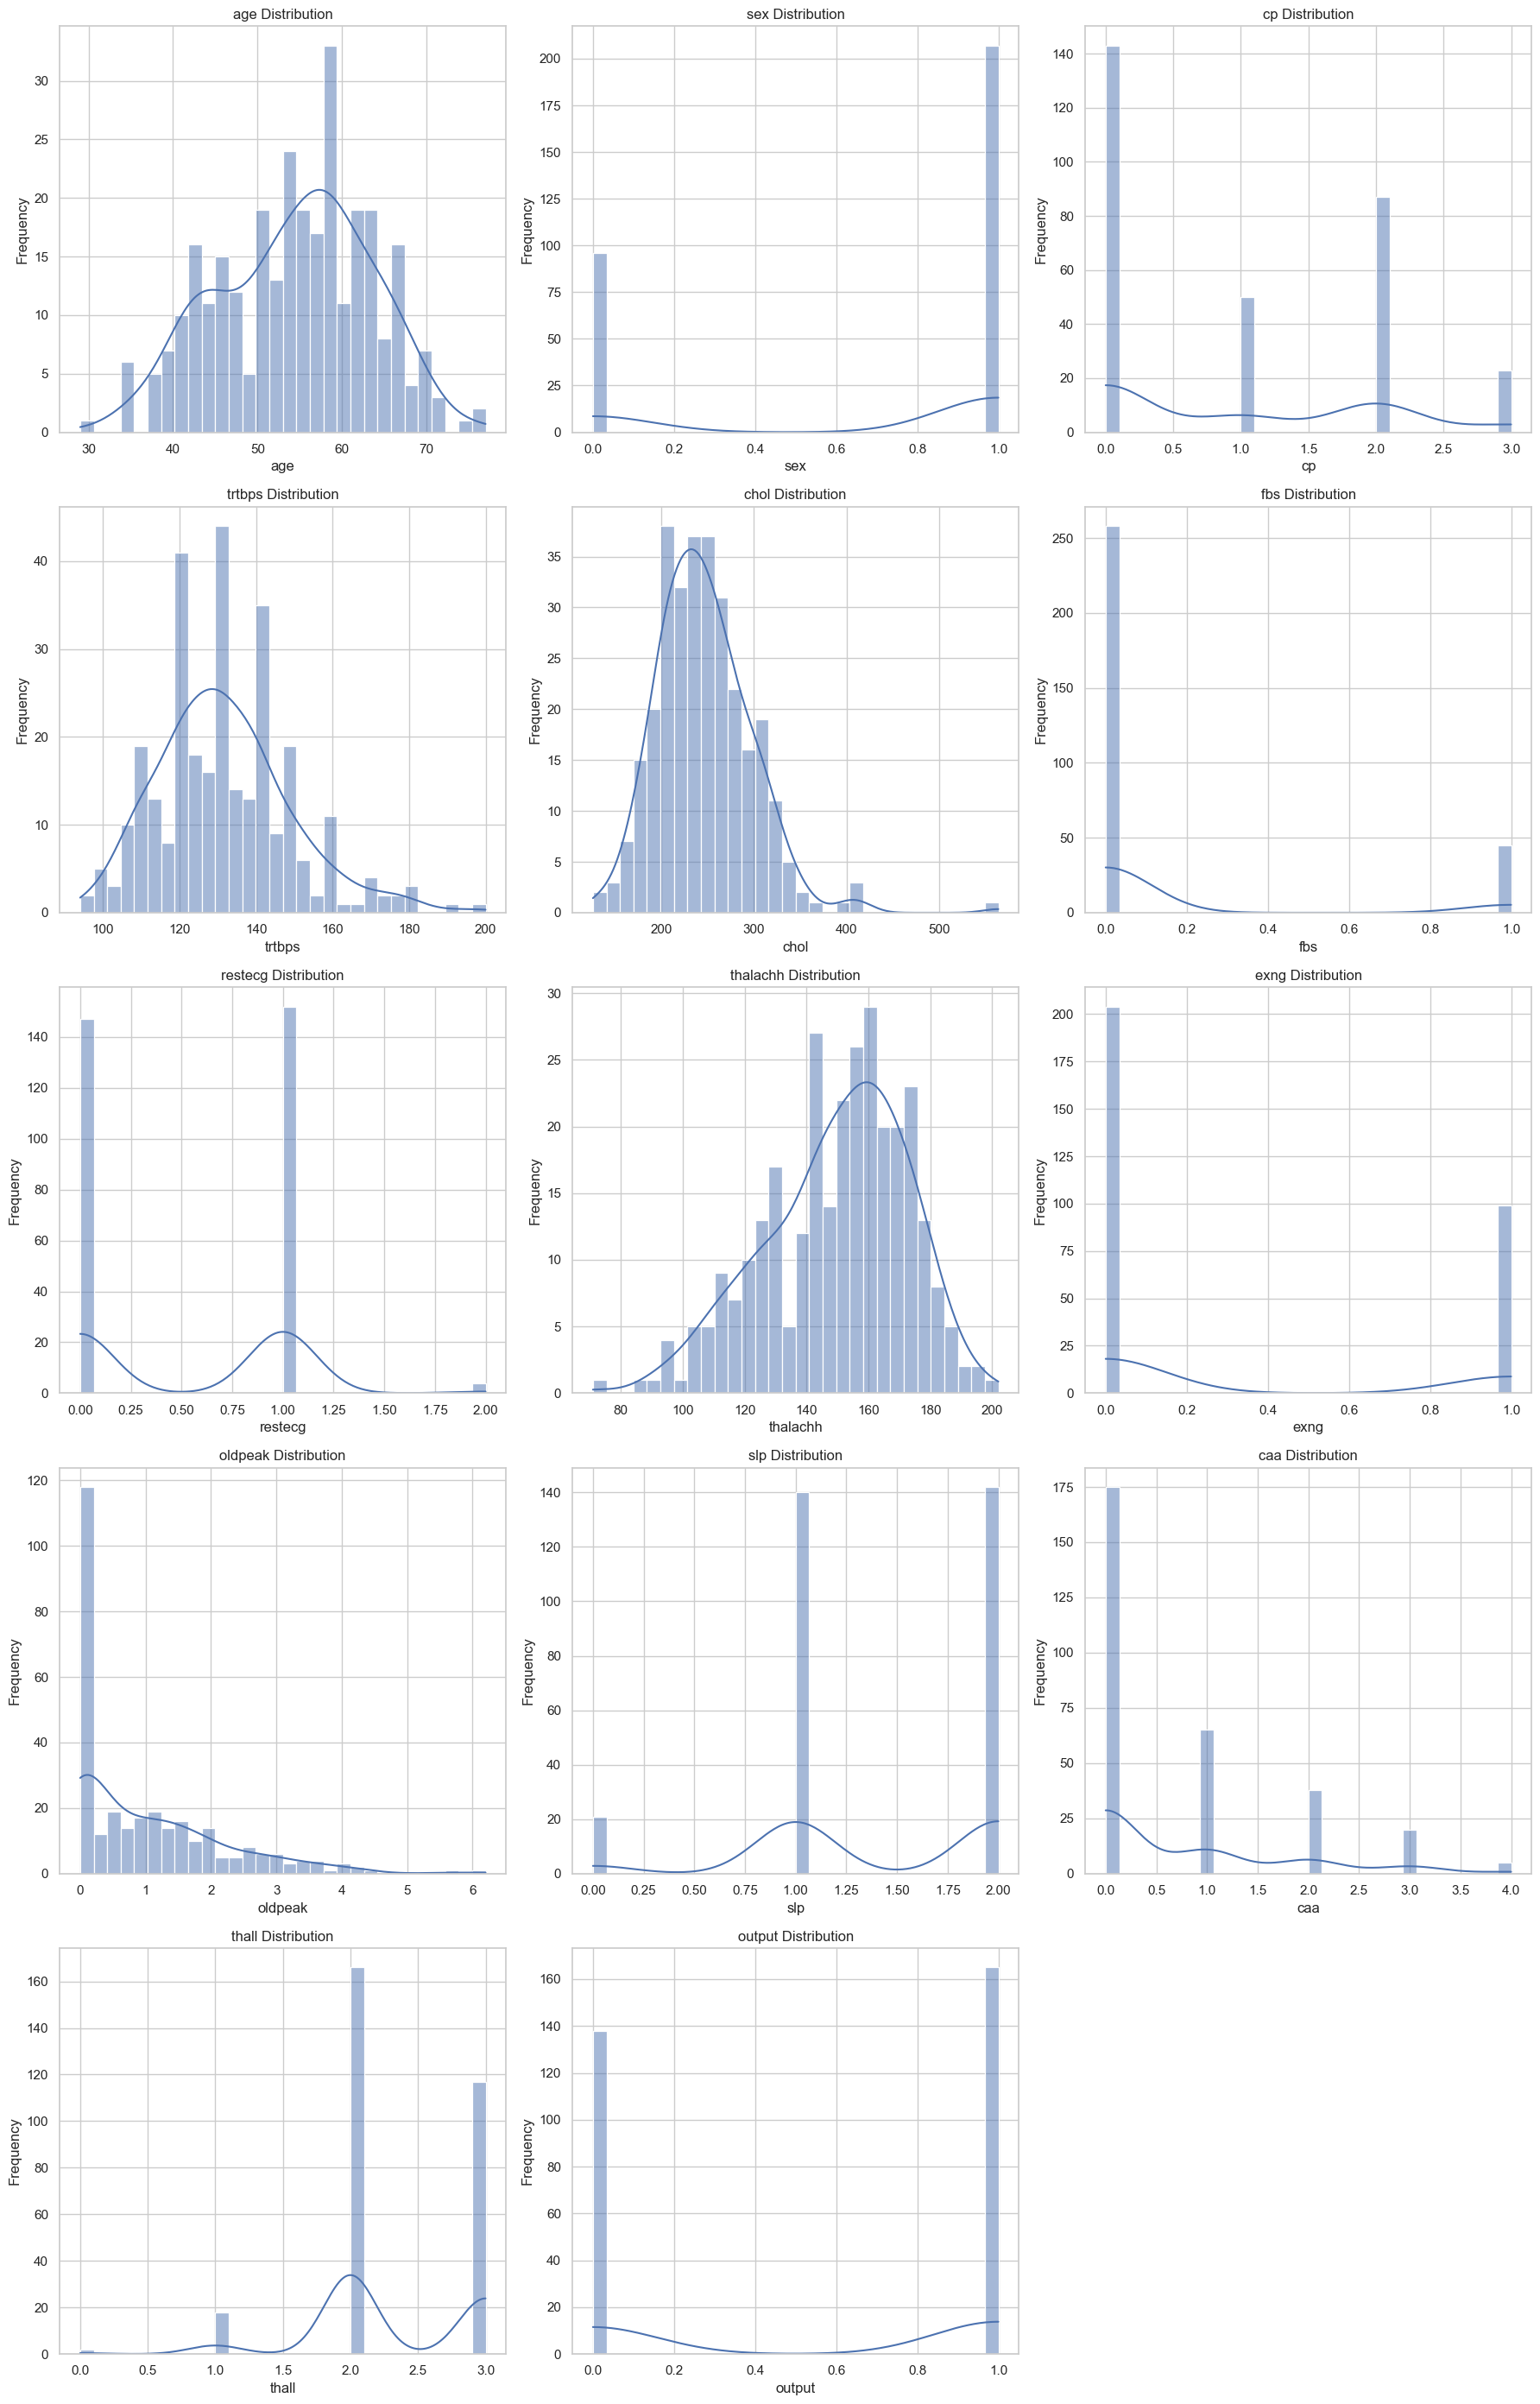

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset/heart.csv')
sns.set(style="whitegrid")

# Function to plot each feature in a subplot
def plot_features(df):
    num_columns = len(df.columns)
    fig, axes = plt.subplots(nrows=num_columns // 3 + 1, ncols=3, figsize=(18, num_columns * 2))
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each column
    for i, column_name in enumerate(df.columns):
        ax = axes[i]
        
        if df[column_name].dtype in ['int64', 'float64']:
            sns.histplot(df[column_name], kde=True, bins=30, ax=ax)
        else:
            sns.countplot(x=column_name, data=df, ax=ax)
        
        ax.set_title(f'{column_name} Distribution')
        ax.set_xlabel(column_name)
        ax.set_ylabel('Frequency' if df[column_name].dtype in ['int64', 'float64'] else 'Count')
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_features(df)


2)Distribution analysis 

Descriptive Statistics:
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std

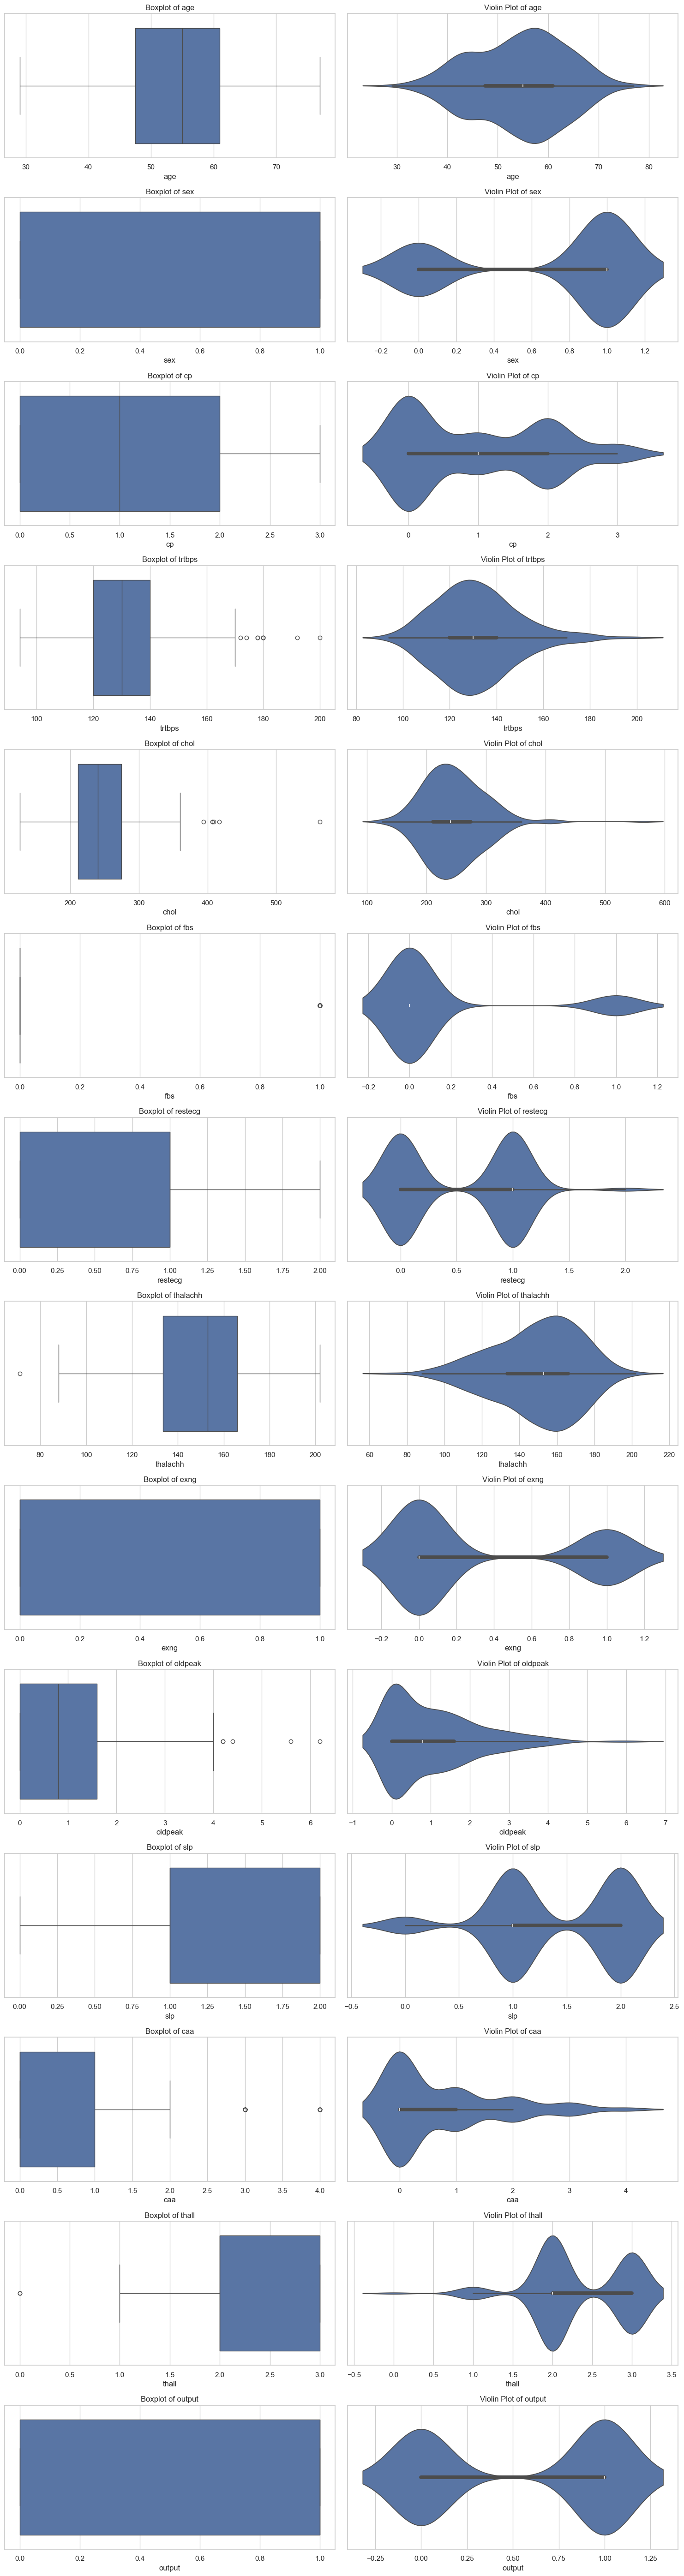

In [2]:
print("Descriptive Statistics:")
print(df.describe())
sns.set(style="whitegrid")

# Function to create box and violin plots in a single figure
def box_violin_plots(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    num_columns = len(numerical_columns)

    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(15, num_columns * 4))

    for i, column in enumerate(numerical_columns):
        sns.boxplot(data=df, x=column, ax=axes[i, 0])
        axes[i, 0].set_title(f'Boxplot of {column}')
        
        sns.violinplot(data=df, x=column, ax=axes[i, 1])
        axes[i, 1].set_title(f'Violin Plot of {column}')

    plt.tight_layout()
    plt.show()


box_violin_plots(df)


3) Correlation analysis

Correlation Matrix:
               age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.06

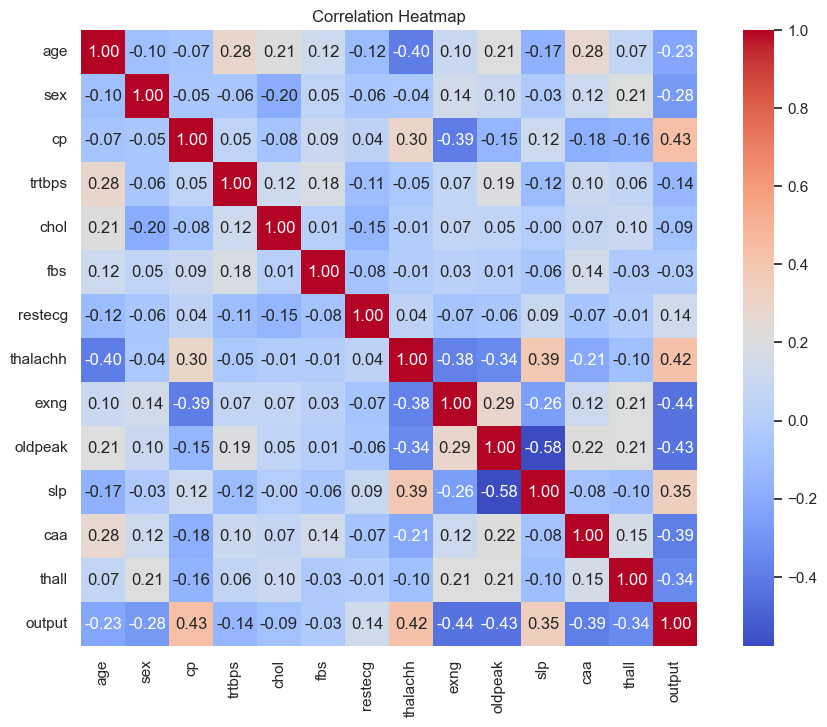

In [3]:
# Compute and Display the correlation matrix
corr_matrix = df.corr()
print("Correlation Matrix:")
print(corr_matrix)

sns.set(style="white")

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()
